In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
plt.style.use("dark_background")

In [27]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
IsNa = {}
for col in df.columns:
    frac = (df[col].isna().sum() / len(df[col])) * 100
    IsNa[col] = frac 
print(IsNa)
# no na found in data set
print(df.shape)
print(df.dtypes)

{'id': 0.0, 'diagnosis': 0.0, 'radius_mean': 0.0, 'texture_mean': 0.0, 'perimeter_mean': 0.0, 'area_mean': 0.0, 'smoothness_mean': 0.0, 'compactness_mean': 0.0, 'concavity_mean': 0.0, 'concave points_mean': 0.0, 'symmetry_mean': 0.0, 'fractal_dimension_mean': 0.0, 'radius_se': 0.0, 'texture_se': 0.0, 'perimeter_se': 0.0, 'area_se': 0.0, 'smoothness_se': 0.0, 'compactness_se': 0.0, 'concavity_se': 0.0, 'concave points_se': 0.0, 'symmetry_se': 0.0, 'fractal_dimension_se': 0.0, 'radius_worst': 0.0, 'texture_worst': 0.0, 'perimeter_worst': 0.0, 'area_worst': 0.0, 'smoothness_worst': 0.0, 'compactness_worst': 0.0, 'concavity_worst': 0.0, 'concave points_worst': 0.0, 'symmetry_worst': 0.0, 'fractal_dimension_worst': 0.0}
(569, 32)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean    

In [29]:
# filter the two diagnosis for plotting later
B_df_col = df.loc[df["diagnosis"] == "B"]
M_df_col = df.loc[df["diagnosis"] == "M"]

B_df_col = B_df_col.drop(columns=["diagnosis","id"])
M_df_col = M_df_col.drop(columns=["diagnosis","id"])

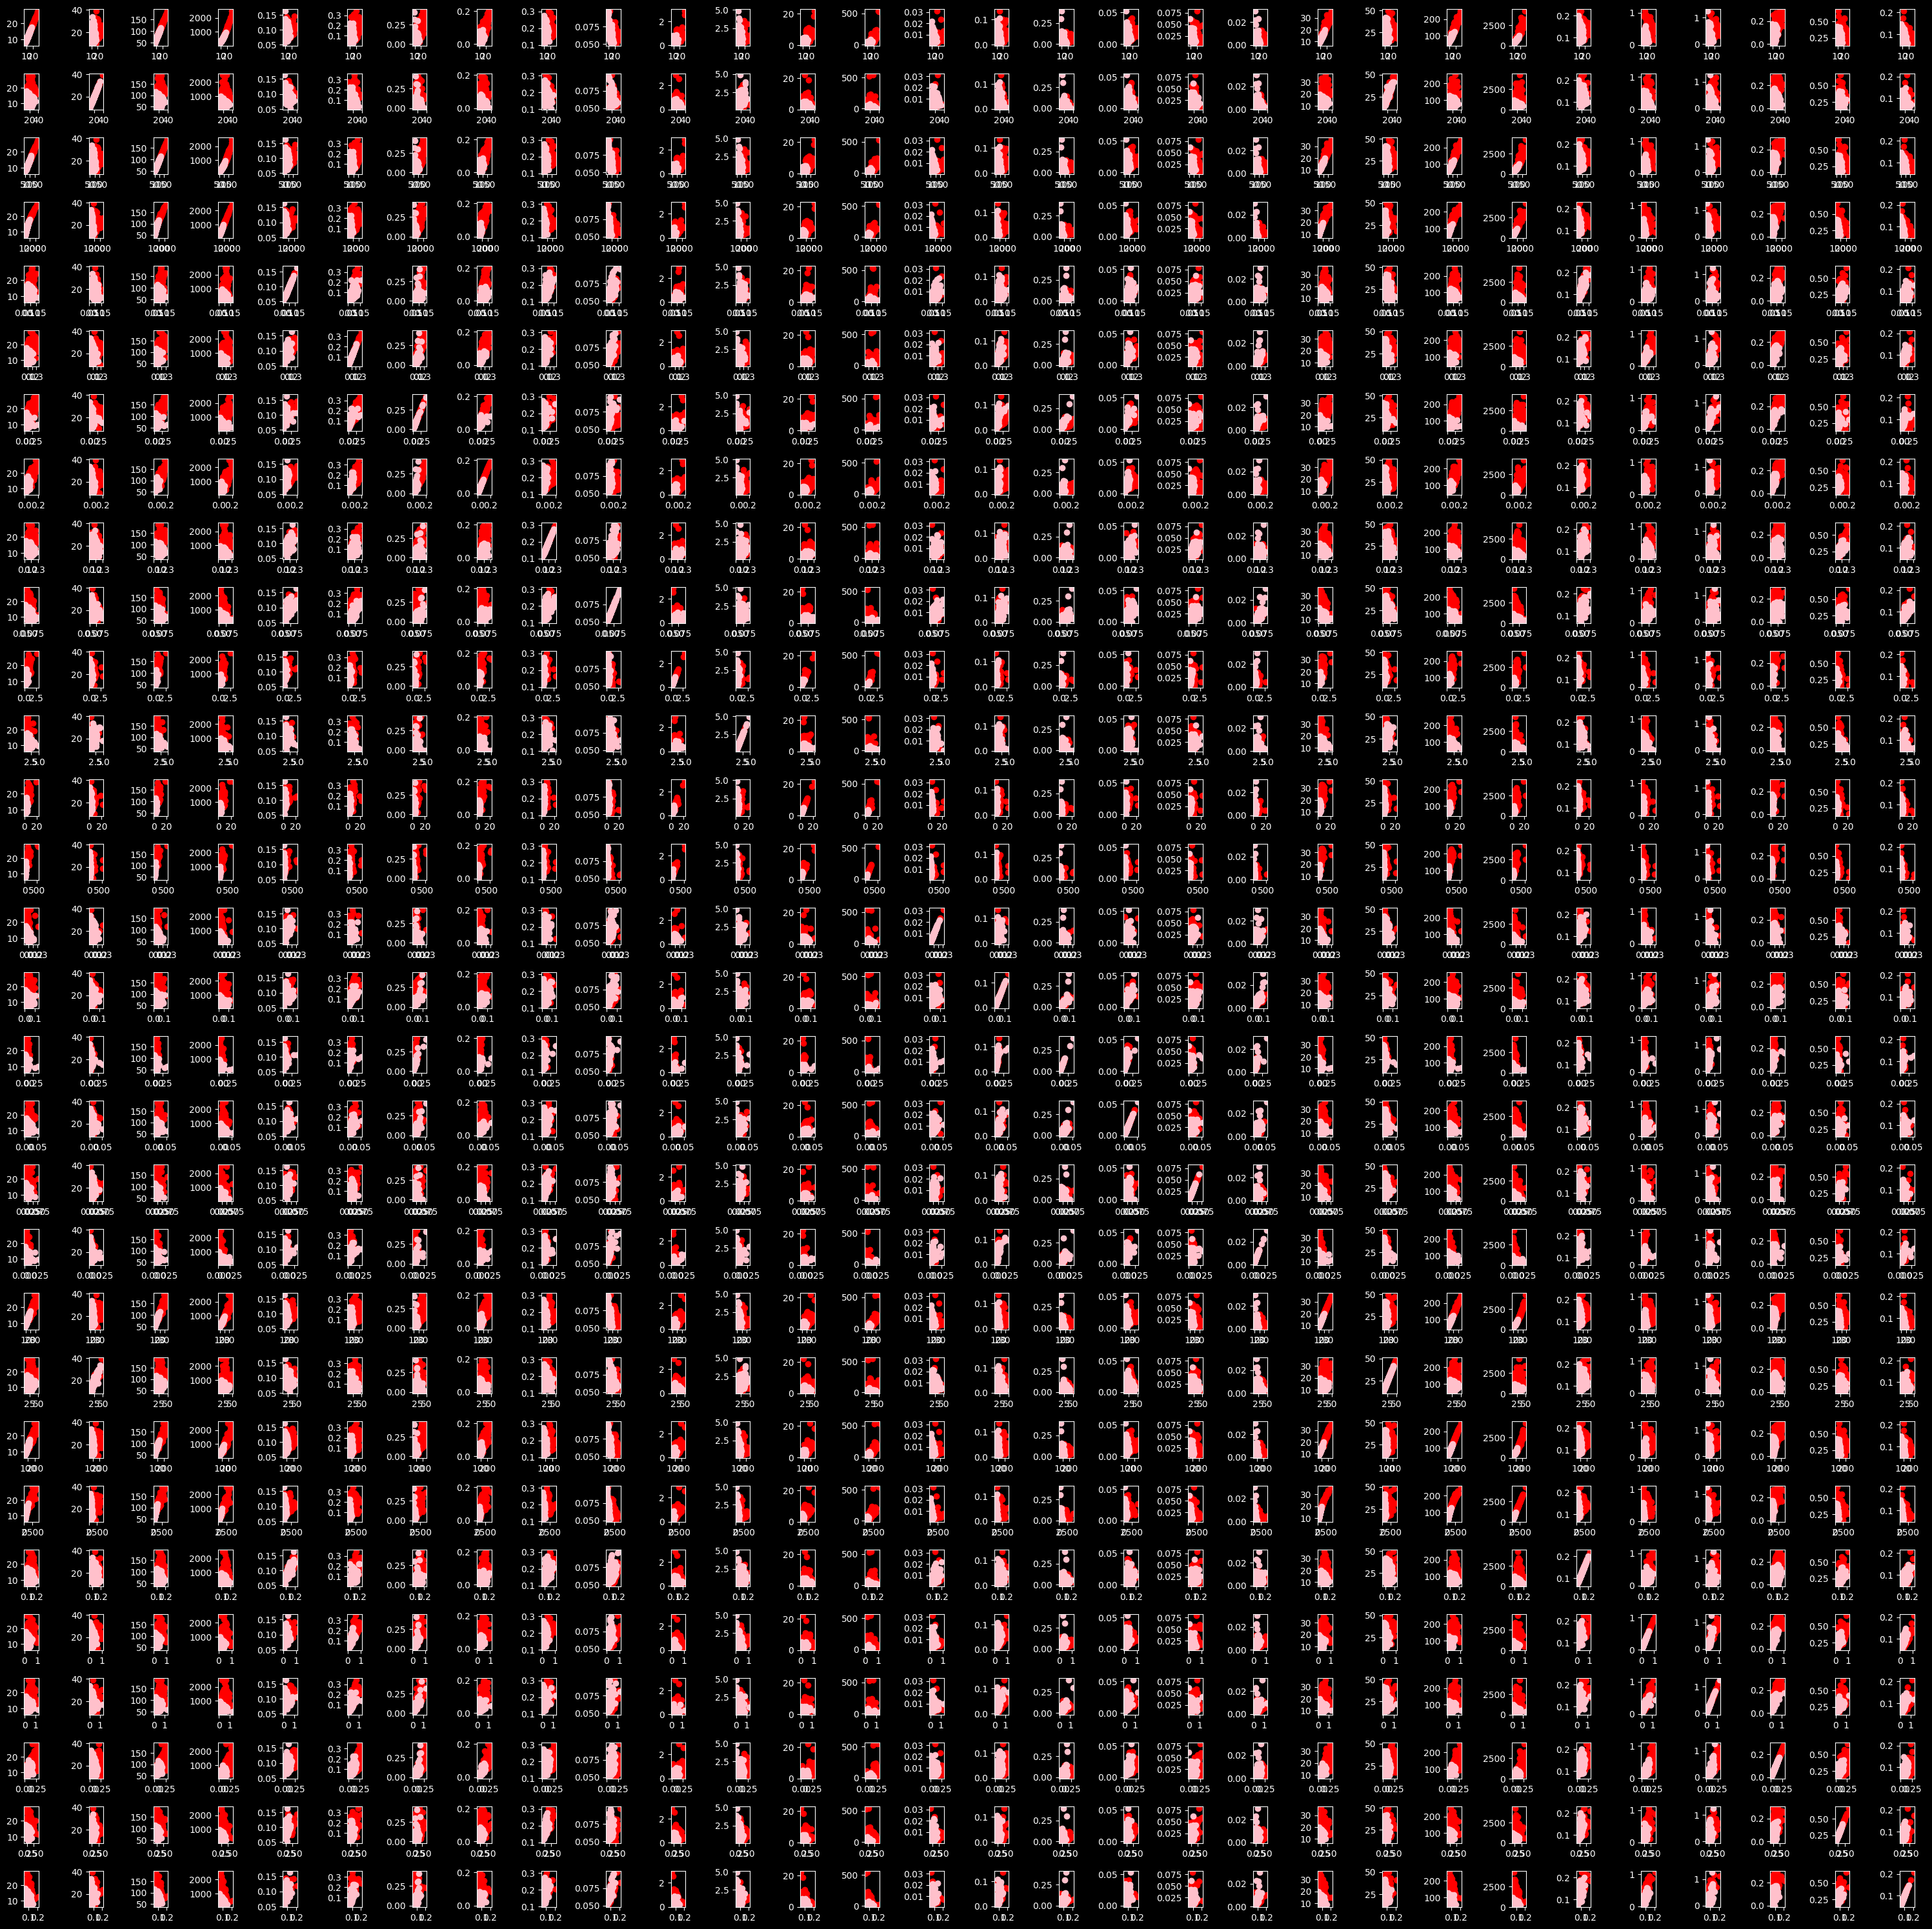

In [30]:
# check correlation between colomns
# pick one of the data for the plotting

num_cols = 30  # Number of columns in the grid
num_rows = 30 # Number of rows in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

axes = axes.flatten()
c=0 
for c1 in M_df_col.columns:
    try:
        for c2 in M_df_col.columns:
            axes[c].scatter(x=M_df_col[c1],y=M_df_col[c2],color ="red")
            axes[c].scatter(x=B_df_col[c1],y=B_df_col[c2],color ="pink")
            c+=1
    except: IndexError
# blue will be the beneign because it is not as harmfull and red will be the malignant cause you know it is deadly
plt.tight_layout()
plt.show()

<AxesSubplot: >

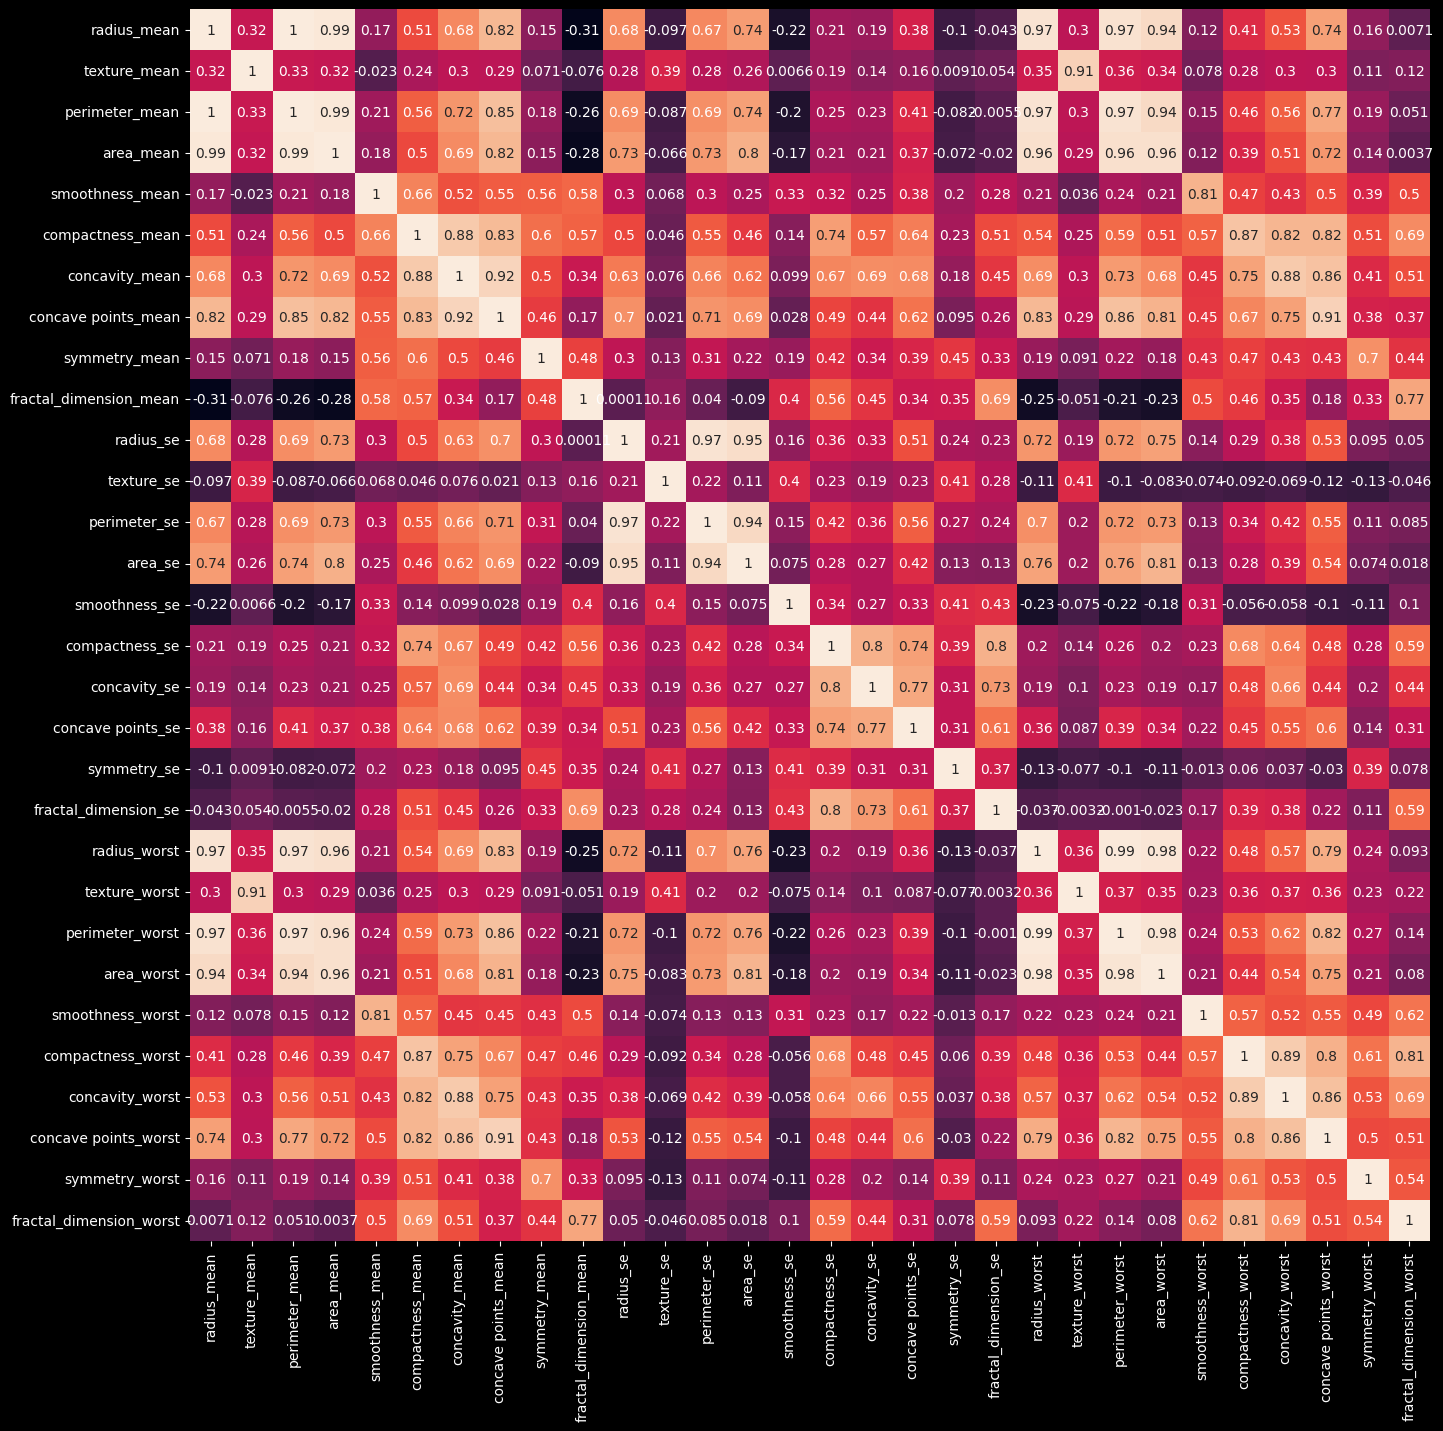

In [31]:
# showing correlation with an R
plt.figure(figsize=(16, 16))
df_cor = df.drop(columns=["id","diagnosis"])
matrix = df_cor.corr()
sns.heatmap(matrix,annot=True,cbar=False)

In [32]:
# before we delete coloumns we dont need we can just use everything
y = df["diagnosis"]
X = df.drop(columns=["id","diagnosis"])


X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
# train the model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
pred =neigh.predict(X_test)
print("predicted:")
print(pred)
print("actual data:")
print(np.array(y_test))

predicted:
['B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B']
actual data:
['B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M'
 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' '

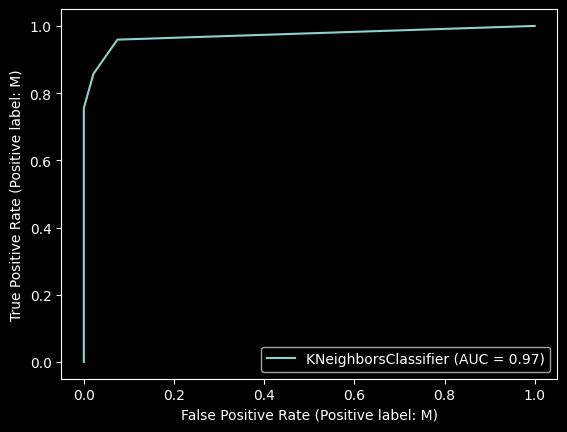

In [35]:
RocCurveDisplay.from_estimator(neigh, X_test, y_test)

In [36]:
# we see that some columns are realy high correlation so those plots can be deleted to see if that makes an impact on the prediction\
# after that we will try other prediction methods and compare them 
df_col_reduced = df.drop(columns=["perimeter_mean","area_mean","radius_worst","perimeter_worst","area_worst","concave points_worst"])




In [37]:
y_red = df_col_reduced["diagnosis"]
X_red= df_col_reduced.drop(columns=["diagnosis","id"])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_red,y_red)
# we can use this one for the rest of the algortimns

In [39]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

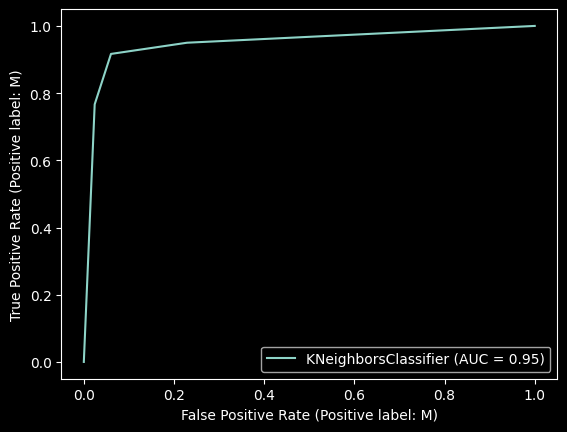

In [40]:
RocCurveDisplay.from_estimator(neigh, X_test, y_test)
# as we can see the prediction went up with deleting the columns that correlate.
# this makes sense for this type of classifier because it makes it a lot easier to predict if the none of the collumns correlate
# reason being that it easier to see wheter one object falls in a group based on the unique features.

In [41]:
svm = svm.SVC()
svm.fit(X_train,y_train)
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

/home/marshellon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

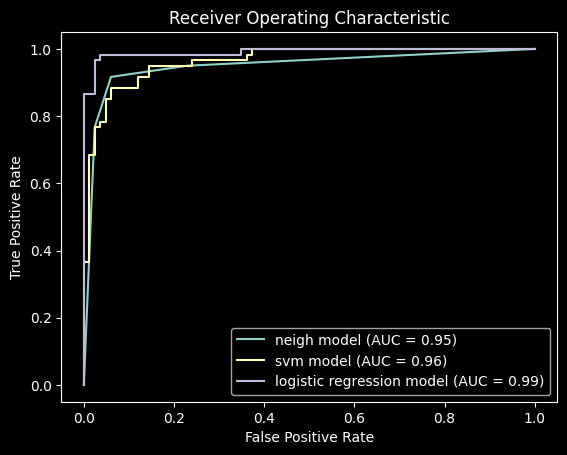

In [42]:
neigh_plot = RocCurveDisplay.from_estimator(neigh, X_test, y_test)
plt.close()
dvm_plot = RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.close()
lr_plot = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.close()

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the ROC curves on the same axis
neigh_plot.plot(ax=ax, name='neigh model')
dvm_plot.plot(ax=ax, name='svm model')
lr_plot.plot(ax=ax, name='logistic regression model')

# Add labels and a legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()

# Display the plot
plt.show()

In [43]:
ly_pred = lr.predict(X_test)
neigh_pred = neigh.predict(X_test)
print("logistic regression:")
print(confusion_matrix(ly_pred,y_test))
print(" ")
print("neigh model:")
print(confusion_matrix(neigh_pred,y_test))

logistic regression:
[[81  6]
 [ 2 54]]
 
neigh model:
[[78  5]
 [ 5 55]]


# Moon and SVC

In [44]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
moon_data = make_moons(n_samples=1000)


In [46]:
X,y= moon_data

In [23]:
for kernel in kernels:
    svm = SVC(kernel=kernel)

(array([[-0.67410607,  0.73863456],
        [-0.24002093,  0.97076771],
        [ 0.62824899, -0.42833248],
        ...,
        [-0.41801642,  0.90843947],
        [-0.50181633,  0.8649742 ],
        [-0.48539075,  0.87429733]]),
 array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 